In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
342,31.0,4,79.0,67,2000,16.0,50
153,34.7,4,105.0,63,2215,14.9,43
73,29.8,4,134.0,90,2711,15.5,44
177,27.0,4,140.0,86,2790,15.6,42
193,27.0,4,97.0,88,2100,16.5,52


### Linear regression with one feature - horsepower

In [3]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
x_train.sample(5)

,horsepower
355,80
247,100
101,125
373,175
113,76


In [5]:
x_train.dtypes

horsepower    int64
dtype: object

In [13]:
from sklearn.linear_model import LinearRegression


# follow the usual sklearn pattern: import, instantiate, fit
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

39.60234276913923
[-0.15512894]


In [14]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6020181871049672


In [16]:
y_pred = linear_model.predict(x_test)

In [26]:
y_pred.shape

(79,)

In [17]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6170220917276978


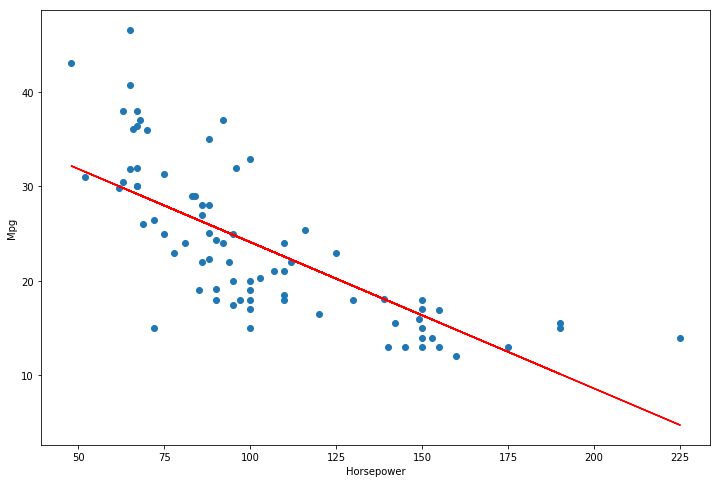

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

### Linear regression with one feature - age

In [28]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

39.60234276913923
[-0.15512894]
Training score:  0.33332949279278046
Testing score:  0.3417142434176037


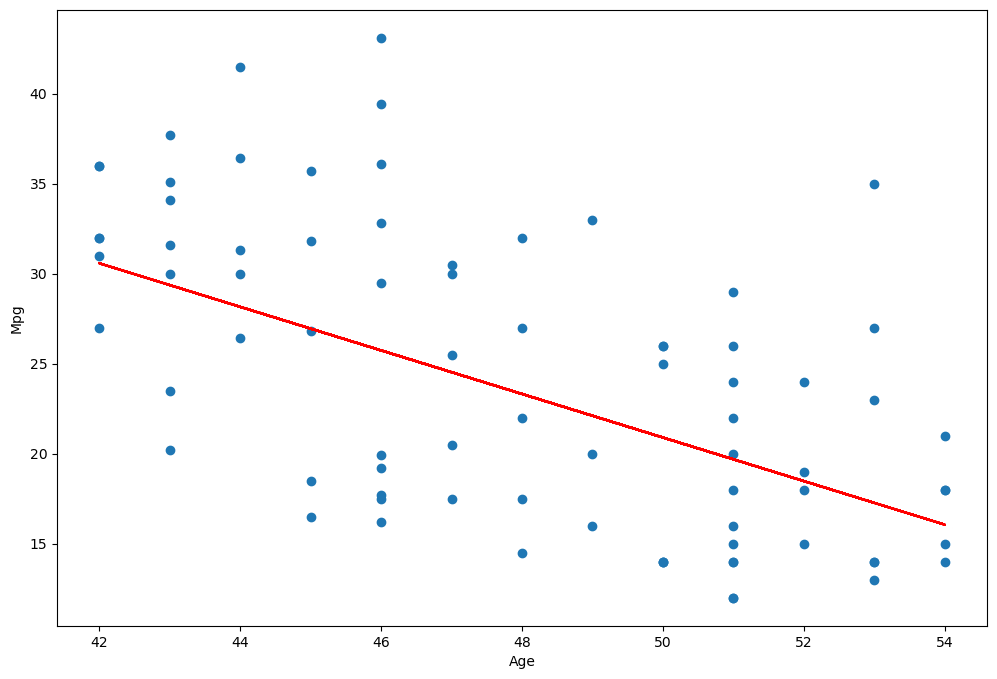

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

### Linear regression with multiple features

In [30]:
## NOTES for recording
## While recording start with uncommented code then change the next line to add 2 more features as shown here
## X = automobile[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]

X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [35]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7040290009270209


In [36]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.053482
weight         -0.005374
displacement   -0.001966
dtype: float64


In [37]:
y_pred = linear_model.predict(x_test)

In [38]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7133706638050218


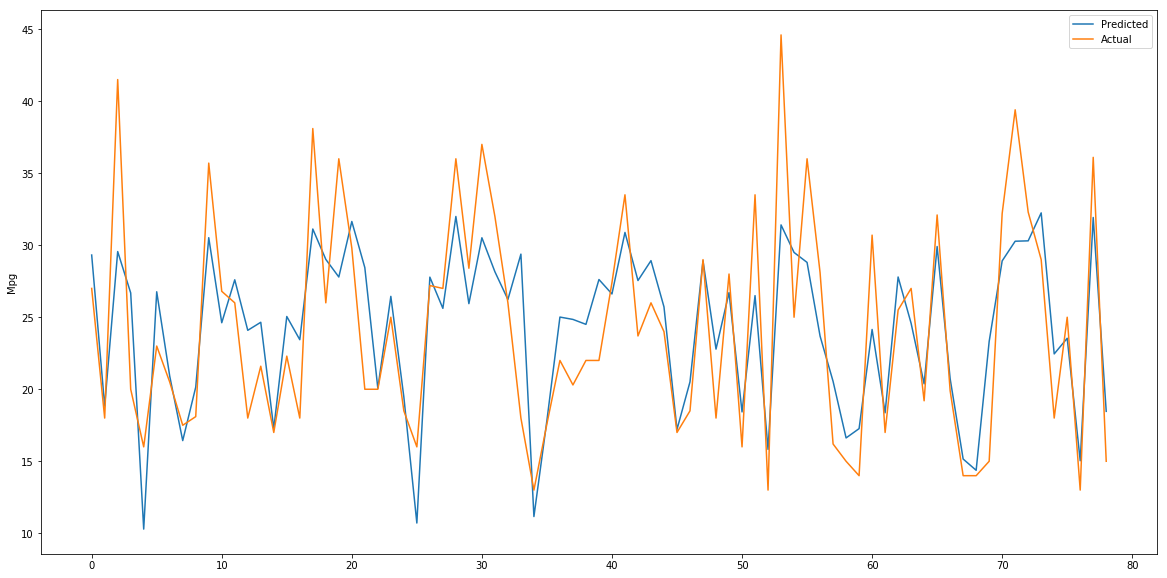

In [18]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [39]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
133,26.8,6,173.0,115,2700,12.9,45
72,32.8,4,78.0,52,1985,19.4,46
279,21.5,6,231.0,115,3245,15.4,45
10,21.5,3,80.0,110,2720,13.5,47
247,19.0,6,232.0,100,2634,13.0,53


In [57]:
## NOTES for recording
## While recording start with uncommented code then change the next line to add 2 more features as shown here
## X = automobile[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]

X = automobile_df[['displacement', 'horsepower', 'weight' , 'cylinders' , 'acceleration' ,'age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [70]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train, y_train)

LinearRegression()

In [71]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.8129903073501333


In [72]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

age            -0.705798
cylinders      -0.130897
horsepower     -0.011821
weight         -0.006827
displacement    0.006610
acceleration    0.040807
dtype: float64


In [73]:
y_pred = linear_model.predict(x_test)

In [74]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7888368183186016


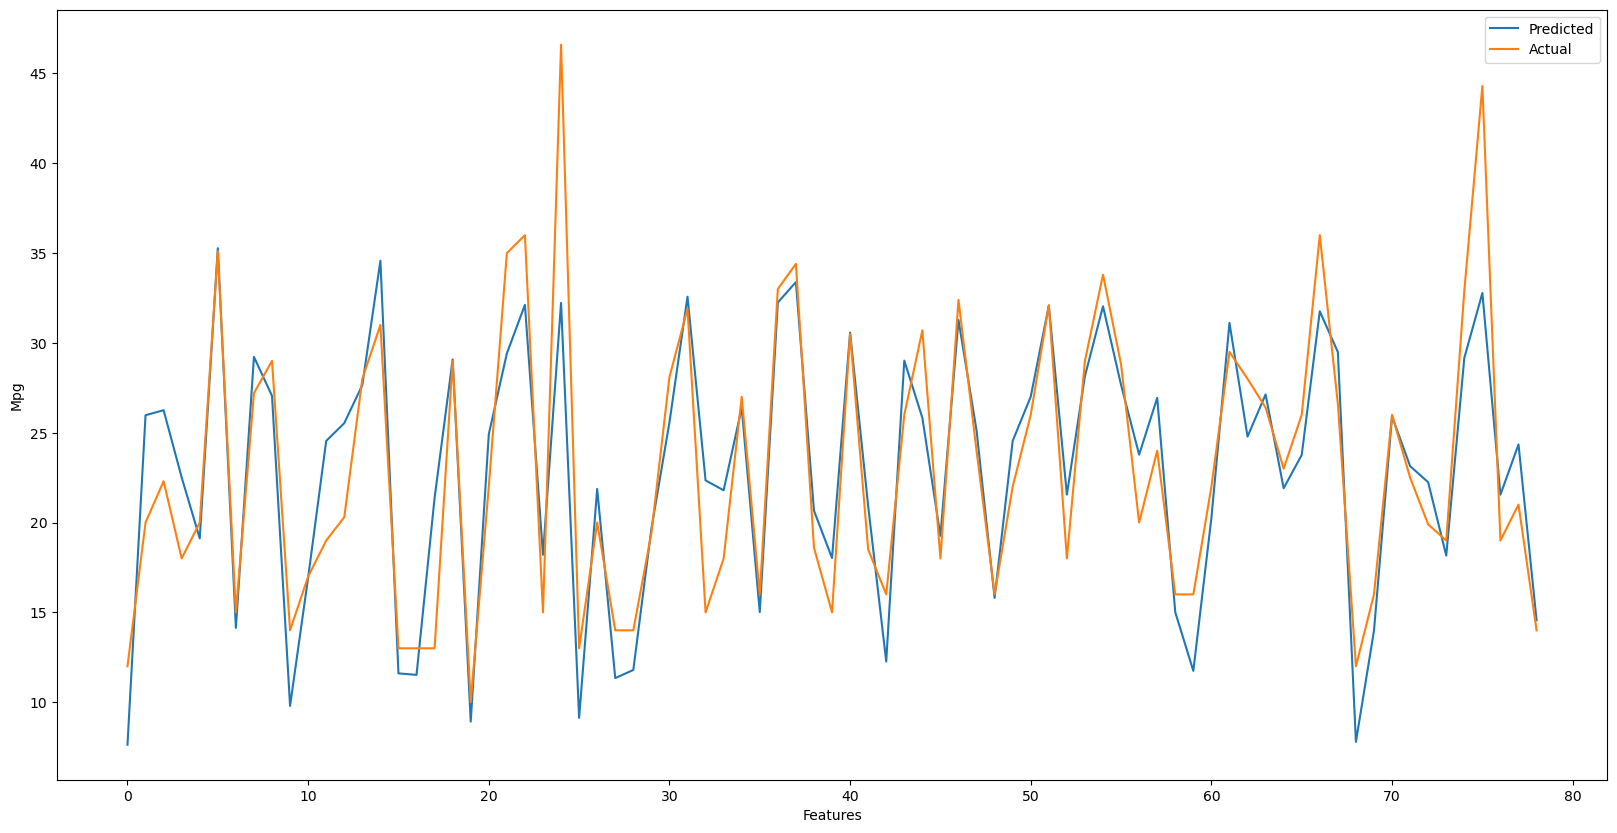

In [64]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')
plt.xlabel('Features')

plt.legend()
plt.show()